<a href="https://colab.research.google.com/github/namwootree/Basic_Skill/blob/main/PyTorch/%EB%94%A5%EB%9F%AC%EB%8B%9D%20%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98%20%EA%B5%90%EA%B3%BC%EC%84%9C/2%EC%9E%A5_%EC%8B%A4%EC%8A%B5_%ED%99%98%EA%B2%BD_%EC%84%A4%EC%A0%95%EA%B3%BC_%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EA%B8%B0%EC%B4%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting

In [7]:
!git clone https://github.com/gilbutITbook/080289.git

Cloning into '080289'...
remote: Enumerating objects: 2273, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 2273 (delta 3), reused 25 (delta 2), pack-reused 2246
Receiving objects: 100% (2273/2273), 330.27 MiB | 56.06 MiB/s, done.
Resolving deltas: 100% (12/12), done.
Checking out files: 100% (2590/2590), done.


# 파이토치 기초 문법

## 텐서 다루기

텐서 생성 및 변환

In [1]:
import torch

print(torch.tensor([[1, 2], [3, 4]])) # 2차원 형태의 텐서 생성
print(torch.tensor([[1, 2], [3, 4]], device='cuda:0')) # GPU에 텐서 생성
print(torch.tensor([[1, 2], [3, 4]], dtype=torch.float64)) # dtype을 이용하여 텐서 생성

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]], device='cuda:0')
tensor([[1., 2.],
        [3., 4.]], dtype=torch.float64)


In [2]:
temp = torch.tensor([[1, 2], [3, 4]])

print(temp.numpy()) # 텐서를 ndarray로 변환

[[1 2]
 [3 4]]


In [3]:
temp = torch.tensor([[1, 2], [3, 4]])

print(temp.to('cpu').numpy()) # GPU상의 텐서를 CPU의 텐서로 변환한 후 ndarray로 변환

[[1 2]
 [3 4]]


텐서의 인덱스 조작

In [4]:
temp = torch.FloatTensor([1, 2, 3, 4, 5, 6, 7]) # 파이토치로 1차원 벡터 생성

print(temp[0], temp[1], temp[-1]) # 인덱스로 접근
print('-------------')
print(temp[2:5], temp[4:-1]) # 슬라이스로 접근

tensor(1.) tensor(2.) tensor(7.)
-------------
tensor([3., 4., 5.]) tensor([5., 6.])


텐서 연산 및 차원 조작

In [5]:
v = torch.tensor([1, 2, 3])
w = torch.tensor([3, 4, 6])

print(w - v)

tensor([2, 2, 3])


In [6]:
temp = torch.tensor([[1, 2], [3, 4]]) # 2 X 2 행렬 생성

print(temp.shape)
print('-------------')
print(temp.view(4, 1)) # 4 X 1 행렬 생성
print('-------------')
print(temp.view(-1)) # 1차원 벡터로 변형
print('-------------')
print(temp.view(1, -1))
print('-------------')
print(temp.view(-1, 1))

torch.Size([2, 2])
-------------
tensor([[1],
        [2],
        [3],
        [4]])
-------------
tensor([1, 2, 3, 4])
-------------
tensor([[1, 2, 3, 4]])
-------------
tensor([[1],
        [2],
        [3],
        [4]])


## 데이터 준비

파이토치에서 제공하는 데이터셋 사용

In [16]:
mkdir MNIST

In [14]:
import requests
import torchvision.transforms as transforms
from torchvision.datasets import MNIST

In [13]:
mnist_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (1.0,))
]) # 평균이 0.5 / 표준편차 1.0이 되도록 데이터의 분포 조정

In [18]:
download_root = '/content/MNIST'

train_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=True)
valid_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=False)
test_dataset = MNIST(download_root, transform=mnist_transform, train=True, download=False)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to /content/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting /content/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to /content/MNIST/MNIST/raw



## 모델 정의

Sequential 신경망을 정의하는 방법

In [38]:
import torch.nn as nn 

class MLP(nn.Module):

  def __init__(self):

    super(MLP, self).__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(in_channels=3,
                  out_channels=64,
                  kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer2 = nn.Sequential(
        nn.Conv2d(in_channels=3,
                  out_channels=64,
                  kernel_size=5),
        nn.ReLU(inplace=True),
        nn.MaxPool2d(2))

    self.layer3 = nn.Sequential(
        nn.Linear(in_features=30*5*5,
                  out_features=10,
                  bias=True),
        nn.ReLU(inplace=True))
    
    def forward(self, x):
      
      x = self.layer1(x)
      x = self.layer2(x)
      x = x.view(x.shape[0], -1)
      x = self.layer3(x)

      return x

In [39]:
model = MLP()

In [40]:
print('Printing children \n------------------------')
print(list(model.children()))
print('\n\n Printing Modules \n----------------------')
print(list(model.modules()))

Printing children 
------------------------
[Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU(inplace=True)
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
), Sequential(
  (0): Linear(in_features=750, out_features=10, bias=True)
  (1): ReLU(inplace=True)
)]


 Printing Modules 
----------------------
[MLP(
  (layer1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(3, 64, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Linear(in_features

# 파이토치 코드 맛보기

In [122]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

데이터 불러오기

In [168]:
path = '/content/080289/chap02/data/car_evaluation.csv'

dataset = pd.read_csv(path)
dataset.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


데이터셋 분포

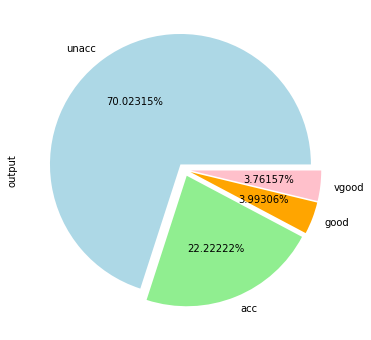

In [169]:
fig_size = plt.rcParams['figure.figsize']
fig_size[0] = 8
fig_size[1] = 6

plt.rcParams['figure.figsize'] = fig_size

dataset.output.value_counts().plot(kind='pie',
                                   autopct='%0.05f%%',
                                   colors=['lightblue', 'lightgreen', 'orange', 'pink'],
                                   explode=(0.05, 0.05, 0.05, 0.05))

데이터를 범주형 타입으로 변환

In [170]:
cat_columns = list(dataset.columns)[:-1]

for cat in cat_columns:

  dataset[cat] = dataset[cat].astype('category')

In [171]:
price = dataset['price'].cat.codes.values
maint = dataset['maint'].cat.codes.values
doors = dataset['doors'].cat.codes.values
persons = dataset['persons'].cat.codes.values
lug_capacity = dataset['lug_capacity'].cat.codes.values
safety = dataset['safety'].cat.codes.values

In [172]:
categorical_data = np.stack([price, maint, doors, persons, lug_capacity, safety], 1)
categorical_data[:10]

array([[3, 3, 0, 0, 2, 1],
       [3, 3, 0, 0, 2, 2],
       [3, 3, 0, 0, 2, 0],
       [3, 3, 0, 0, 1, 1],
       [3, 3, 0, 0, 1, 2],
       [3, 3, 0, 0, 1, 0],
       [3, 3, 0, 0, 0, 1],
       [3, 3, 0, 0, 0, 2],
       [3, 3, 0, 0, 0, 0],
       [3, 3, 0, 1, 2, 1]], dtype=int8)

In [173]:
categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[3, 3, 0, 0, 2, 1],
        [3, 3, 0, 0, 2, 2],
        [3, 3, 0, 0, 2, 0],
        [3, 3, 0, 0, 1, 1],
        [3, 3, 0, 0, 1, 2],
        [3, 3, 0, 0, 1, 0],
        [3, 3, 0, 0, 0, 1],
        [3, 3, 0, 0, 0, 2],
        [3, 3, 0, 0, 0, 0],
        [3, 3, 0, 1, 2, 1]])

레이블로 사용할 칼럼을 텐서로 변환

In [174]:
outputs = pd.get_dummies(dataset.output)
outputs = outputs.values
outputs = torch.tensor(outputs).flatten()

In [175]:
print(categorical_data.shape)
print(outputs.shape)

torch.Size([1728, 6])
torch.Size([6912])


범주형 칼럼을 N차원으로 변환

In [176]:
categorical_column_sizes = [len(dataset[column].cat.categories) for column in cat_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(4, 2), (4, 2), (4, 2), (3, 2), (3, 2), (3, 2)]


데이터셋 분리

In [177]:
total_records = 1728
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [178]:
print(len(categorical_train_data))
print(len(train_outputs))
print(len(categorical_test_data))
print(len(test_outputs))

1383
1383
345
345


모델 생성


In [179]:
class Model(nn.Module):

  def __init__(self, embedding_size, output_size, layers, p=0.4):

    super().__init__()
    self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
    self.embedding_dropout = nn.Dropout(p)

    all_layers = []

    num_cat_cols = sum((nf for ni, nf in embedding_size))
    input_size = num_cat_cols

    for i in layers:

      all_layers.append(nn.Linear(input_size, i))
      all_layers.append(nn.ReLU(inplace=True))
      all_layers.append(nn.BatchNorm1d(i))
      all_layers.append(nn.Dropout(p))

      input_size = i

    all_layers.append(nn.Linear(layers[-1], output_size))
    self.layers = nn.Sequential(*all_layers)
  
  def forward(self, x_cat):

    embeddings = []

    for i, e in enumerate(self.all_embeddings):

      embeddings.append(e(x_cat[:, i]))
    
    x = torch.cat(embeddings, 1)
    x = self.embedding_dropout(x)
    x = self.layers(x)

    return x

In [180]:
model = Model(categorical_embedding_sizes, 4, [200, 100, 50], p=0.4)
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(4, 2)
    (1): Embedding(4, 2)
    (2): Embedding(4, 2)
    (3): Embedding(3, 2)
    (4): Embedding(3, 2)
    (5): Embedding(3, 2)
  )
  (embedding_dropout): Dropout(p=0.4, inplace=False)
  (layers): Sequential(
    (0): Linear(in_features=12, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=50, out_features=4, bias=True)
  )
)


모델의 파라미터 정의

In [181]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

CPU/GPU 사용 지정

In [182]:
if torch.cuda.is_available():

  device = torch.device('cuda')

else:

  device = torch.device('cpu')

모델 학습

In [183]:
epochs = 500
aggregated_losses = []
train_outputs = train_outputs.to(device=device, dtype=torch.int64)

In [184]:
for i in range(epochs):

  i += 1

  y_pred = model(categorical_train_data).cuda()
  single_loss = loss_function(y_pred, train_outputs)
  aggregated_losses.append(single_loss)

  if i % 25 == 1:

    print(f'epoch : {i:3} loss : {single_loss.item():10.8f}')

  optimizer.zero_grad()
  single_loss.backward()
  optimizer.step()

print(f'epoch : {i:3} loss : {single_loss.item():10.10f}')

epoch :   1 loss : 1.59256935
epoch :  26 loss : 1.37011051
epoch :  51 loss : 1.28025985
epoch :  76 loss : 1.19898927
epoch : 101 loss : 1.05657947
epoch : 126 loss : 0.94669986
epoch : 151 loss : 0.82433528
epoch : 176 loss : 0.74136531
epoch : 201 loss : 0.70851761
epoch : 226 loss : 0.66103274
epoch : 251 loss : 0.64466512
epoch : 276 loss : 0.62622654
epoch : 301 loss : 0.60679650
epoch : 326 loss : 0.59749079
epoch : 351 loss : 0.59407973
epoch : 376 loss : 0.58655542
epoch : 401 loss : 0.58590066
epoch : 426 loss : 0.57669574
epoch : 451 loss : 0.57429475
epoch : 476 loss : 0.57685661
epoch : 500 loss : 0.5711442828


테스트 데이터셋으로 모델 예측

In [185]:
test_outputs = test_outputs.to(device=device, dtype=torch.int64)

with torch.no_grad():

  y_val = model(categorical_test_data).cuda()
  loss = loss_function(y_val, test_outputs)

print(f'Loss : {loss:.8f}')

Loss : 0.56779897


In [186]:
print(y_val[:5])

tensor([[ 4.4949,  3.0391, -5.1406, -4.9798],
        [ 2.8774,  1.7915, -3.1463, -3.0018],
        [ 1.9756,  1.2556, -2.3966, -2.3223],
        [ 2.3050,  1.3949, -3.4085, -3.2658],
        [ 2.3627,  1.4715, -2.7184, -2.6621]], device='cuda:0')


In [187]:
y_val = np.argmax(y_val.cpu().numpy(), axis=1)
print(y_val[:5])

[0 0 0 0 0]


테스트 데이터셋을 이용한 정확도 확인

In [188]:
import warnings
warnings.filterwarnings('ignore') 

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

test_outputs=test_outputs.cpu().numpy()

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[257   2]
 [ 86   0]]
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       259
           1       0.00      0.00      0.00        86

    accuracy                           0.74       345
   macro avg       0.37      0.50      0.43       345
weighted avg       0.56      0.74      0.64       345

0.744927536231884
